# Step 1:- Import Libraries, Read File, Understand Data 
(keep adding new libraries whenever a new library is required)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import plot_tree,DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#setting Numpy array print option to print decimal values upto 4 decimal places
np.set_printoptions(precision=4,linewidth=100)
%matplotlib inline

In [2]:
mba_salary_df=pd.read_csv('../data/MBA Salary.csv')

In [3]:
mba_salary_df.head(5)

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000


In [4]:
mba_salary_df.describe()

,S. No.,Percentage in Grade 10,Salary
count,50.00000,50.000000,50.000000
mean,25.50000,63.922400,258192.000000
std,14.57738,9.859937,76715.790993
min,1.00000,37.330000,120000.000000
25%,13.25000,57.685000,204500.000000
50%,25.50000,64.700000,250000.000000
75%,37.75000,70.000000,300000.000000
max,50.00000,83.000000,450000.000000


In [5]:
mba_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [6]:
mba_salary_df.skew()

S. No.                    0.000000
Percentage in Grade 10   -0.188679
Salary                    0.504584
dtype: float64

Percentage in Grade 10" column is lightly skewed to the left and "Salary" column is lightly skewed to the right.

In [7]:
shapiro_test_statistic, p_value = shapiro(mba_salary_df['Percentage in Grade 10'])
print('Shapiro-Wilk test statistic:', shapiro_test_statistic)
print('p-value:', p_value) #The Shapiro-Wilk test statistic is 0.983, which is close to 1, indicating
#that the distribution is approximately normal. The p-value is 0.679, which
#is greater than 0.05, indicating that the null hypothesis of normality cannot
#be rejected at the 5% significance level. So the distribution is normal with little skewness to the left side.
shapiro_test_statistic, p_value = shapiro(mba_salary_df['Salary'])
print('Shapiro-Wilk test statistic:', shapiro_test_statistic)
print('p-value:', p_value) #The Shapiro-Wilk test statistic is 0.961, which is close to 1, indicating
#that the distribution is approximately normal. The p-value is 0.095, which
#is greater than 0.05, indicating that the null hypothesis of normality cannot
#be rejected at the 5% significance level. So the distribution is normal with little skewness to the right side.

Shapiro-Wilk test statistic: 0.982899954050866
p-value: 0.6789281722536786
Shapiro-Wilk test statistic: 0.960737214067921
p-value: 0.09544840649682401


Lets try to visualize data to get more understanding.

# Step 2:- Visualize Data
To get an idea about the data and which model to apply
<p>
<b>1. Visualize Data</b><br>
<b>2. Try to understand the distribution of the data</b>

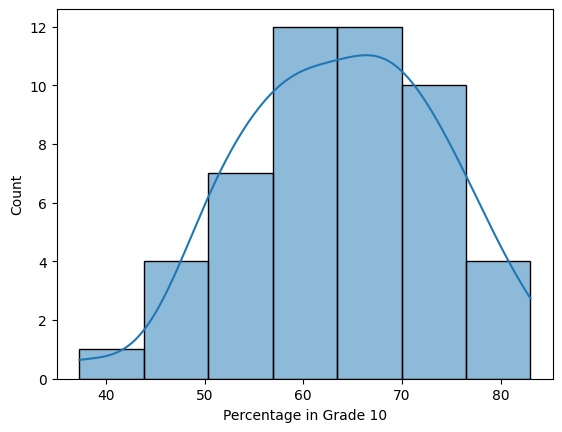

In [8]:
sns.histplot(data=mba_salary_df, x='Percentage in Grade 10', kde=True)
plt.show()

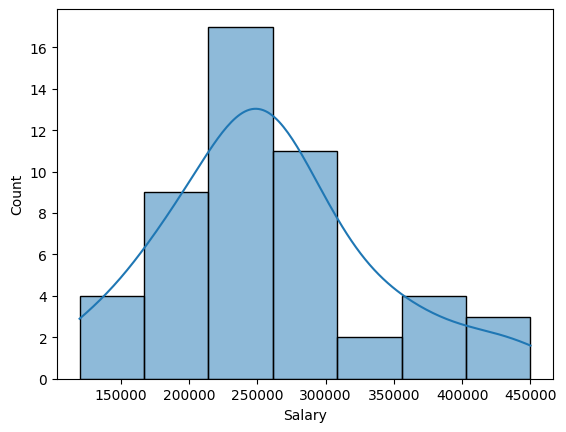

In [9]:
sns.histplot(data=mba_salary_df, x='Salary', kde=True)
plt.show()

37.33 is a passing mark so we will consider it is a valid data. Using scatter plot we will try to find the pattern in the data.

<Axes: xlabel='Percentage in Grade 10', ylabel='Salary'>

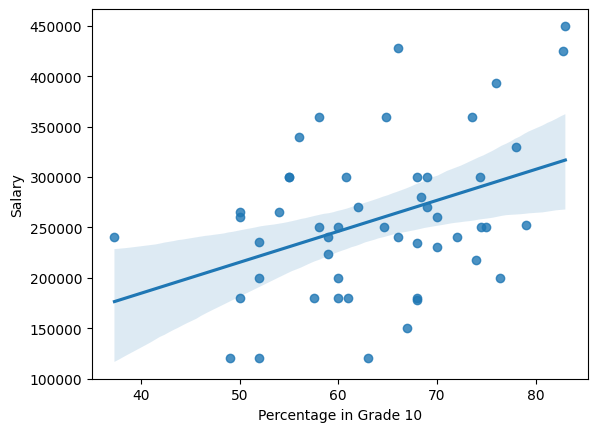

In [10]:
sns.regplot(x='Percentage in Grade 10',y='Salary',data=mba_salary_df)

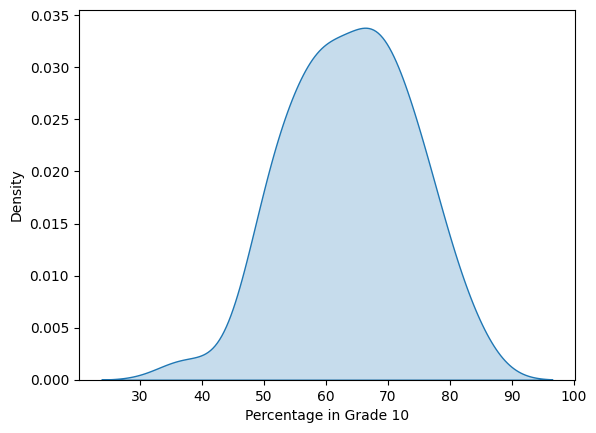

In [11]:
sns.kdeplot(data=mba_salary_df['Percentage in Grade 10'], fill=True)
plt.show()

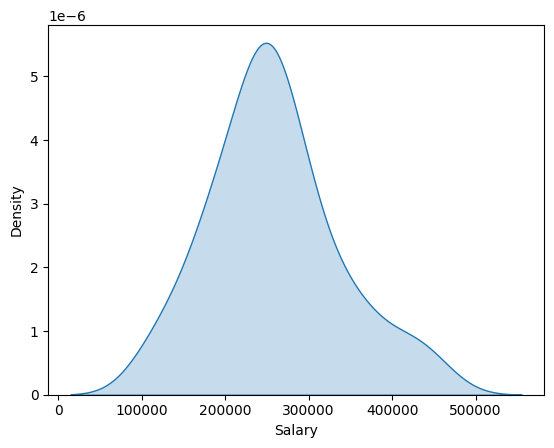

In [12]:
sns.kdeplot(data=mba_salary_df['Salary'], fill=True)
plt.show()

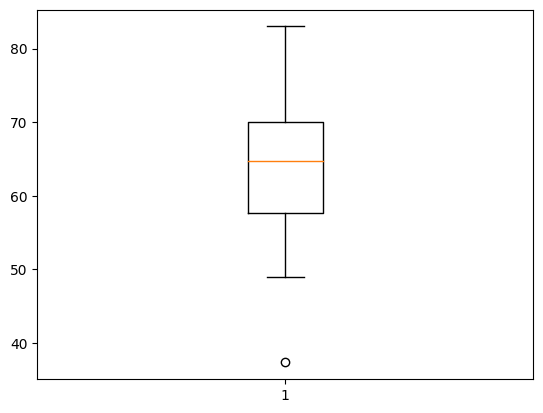

In [13]:
plt.boxplot(mba_salary_df['Percentage in Grade 10']) #to check outliers
plt.show()

# Step 3:- Split the data before any kind of preprocessing

In [14]:
#split the dataset into train and test set into 80:20 respectively
train_X,test_X,train_y,test_y=train_test_split(mba_salary_df['Percentage in Grade 10'],mba_salary_df['Salary'],train_size=0.8,random_state=100)

# Step 4:- Preprocessing Data

In [15]:
type(test_y)

pandas.core.series.Series

<h3>Ensure that the data does not contain any null values, and if so, manage them by either dropping or replacing the missing values.</h3>

In [16]:
mba_salary_df[mba_salary_df.isnull().any(axis=1)]

,S. No.,Percentage in Grade 10,Salary


<h3>Identify and address any duplicate values that may exist in the data.</h3>

In [17]:
duplicate_percentage=mba_salary_df[mba_salary_df['Percentage in Grade 10'].duplicated(keep=False)]
print('total numbers of duplicate data is=',duplicate_percentage[duplicate_percentage>1].shape[0])
print('Duplicate values are...')
duplicate_percentage[duplicate_percentage>1].sort_values(by='Percentage in Grade 10')

total numbers of duplicate data is= 24
Duplicate values are...


,S. No.,Percentage in Grade 10,Salary
21,22,50.0,260000
26,27,50.0,180000
39,40,52.0,200000
37,38,52.0,236000
23,24,52.0,120000
5,6,55.0,300000
32,33,55.0,300000
10,11,58.0,250000
28,29,58.0,360000
9,10,59.0,240000


It appears that half of the data is duplicated, with some entries exceeding four or five occurrences. However, these data points appear to be valid and cannot be discarded. Simultaneously, it is clear that predicting the output using only this feature is not feasible.

In [18]:
mba_salary_df.head(2)

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000


We can not see any visible problem in the data so we will skip this step

<h3><span style="color: brown;"> Common Executables </span>  </h3>These are used mutiple times

2D Data conversion (Required For Models)

In [19]:
mba_10_percentage_2D=mba_salary_df['Percentage in Grade 10'].values.reshape(-1,1)
mba_salary_2D=mba_salary_df['Salary'].values.reshape(-1,1)
train_X_2D=train_X.values.reshape(-1,1)
train_y_2D=train_y.values.reshape(-1,1)
test_X_2D=test_X.values.reshape(-1,1)
test_y_2D=test_y.values.reshape(-1,1)

In [20]:
def print_prediction(test_y, pred_y, test_X):
    results_actual = pd.DataFrame({'Actual': test_y}, index=test_X.index)
    results_predicted = pd.DataFrame({'Predicted': pred_y}, index=test_X.index)
    actual_percentage = pd.DataFrame({'10th Grade Percentage': test_X}, index=test_X.index)
    # Concatenate DataFrames along columns (axis=1)
    results = pd.concat([actual_percentage,results_actual, results_predicted], axis=1)

    return results

In [21]:
def residual_check(test_y,pred_y):
    mse_val=mean_squared_error(test_y,pred_y)
    mae_val=mean_absolute_error(test_y,pred_y)
    r2_val=r2_score(test_y,pred_y)
    print("mse= ",mse_val,", mae= ",mae_val," and r2_score= ",r2_val)
    return mse_val,mae_val,r2_val

In [22]:
def compare_evaluation_metric(original_model,current_model):
    mse_original=eval('mse_'+original_model)
    mse_current=eval('mse_'+current_model)
    mae_original=eval('mae_'+original_model)
    mae_current=eval('mae_'+current_model)
    r2_original=eval('r2_'+original_model)
    r2_current=eval('r2_'+current_model)
    print("MSE wise, "+current_model+" is better model than "+original_model+" model, MSE for "+original_model+" is= " +str(mse_original) if mse_original-mse_current>0 else "MSE wise "+original_model+" is better, it's MSE value is= "+str(mse_original))
    print("MAE wise, "+current_model+" is better model than "+original_model+" model, MAE for "+original_model+" is= " +str(mae_original) if mae_original-mae_current>0 else "MAE wise "+original_model+" is better, it's MAE value is= "+str(mae_original))
    print("R2 wise, "+current_model+" is better model than "+original_model+" model, R2 for "+original_model+" is= " +str(r2_original) if r2_current-r2_original>0 else "R2 wise "+original_model+" is better, it's R2 value is= "+str(r2_original))

In [23]:
def actual_vs_prediction_scatter_plot(test_y,pred_y):
    plt.figure(figsize=(6, 4))
    plt.scatter(test_y,pred_y, c='green',edgecolor='black',linewidths=1, alpha=0.75)
    plt.title('Actual vs Predicted Salary')
    plt.xlabel('Actual Salary')
    plt.ylabel('Predicted Salary')
    plt.show()

# Step 5:- Find Correct Model

Decide what kind of model we should apply

In [24]:
mba_salary_df['Percentage in Grade 10'].corr(mba_salary_df['Salary'])

0.3953673071251282

The data is numeric with positively correlation. We will start with linear regression model.

First we will use statsmodels.api which is used for statistics regression model, in this model we need to add intercept so that model can perform better.

<h2><span style="color: red;"> Model 1:- </span> Statistics Ordinary Least Square </h2>Baseline Model- Ordinary Least Square Model

In [25]:
X=sm.add_constant(train_X) #feature
mba_reg_model_ols=sm.OLS(train_y,X)
#Fit the regression model
mba_reg_model=mba_reg_model_ols.fit()
mba_reg_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2025-02-07 18:12      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8088 176079.3801
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

<b>Observation:-</b> <br>
1. the generated equation is , salary=30587.285652+3560.587383*"Percentage in Grade 10"<br>
2. different value in random_state parameter value is giving different equation and we can not use gridsearchcv to findout best value for random_state.<br>
3. R-squared value is .211, that means 21.1% of the variation in salary.<br>
4. But for const, p value is higher than 0.5 and if we change randome state=160 then p values drops below 0.5 and in this case equation will be salary=124947.137284+2023.8031*"Percentage in Grade 10".<br>
5. We will test the regression model using our test data.


<h3>wls_prediction_std is a function which helps use to get the prediction interval. It provides a range within which a new observation is likely to fall based on the input data. the wider the prediction interval, the greater the uncertainity in predicting a new data points.</h3>

In [26]:
ols_test_X_2D=sm.add_constant(test_X)
pred_y=mba_reg_model.predict(ols_test_X_2D)
#find the possible range of prediction
all_wls=wls_prediction_std(mba_reg_model,ols_test_X_2D , alpha=0.1)
#predict the low and high interval values for y
_,pred_y_low,pred_y_high=wls_prediction_std(mba_reg_model, ols_test_X_2D, alpha=0.05)
wls_prediction=pd.DataFrame({'predict_y_left':pred_y_low,
                                        'predict_y_right':pred_y_high})
prediction_list=print_prediction(test_y, pred_y, test_X)
mba_student_first_prediction = prediction_list.assign(predict_y_left=pred_y_low,
                                        predict_y_right=pred_y_high)
mba_student_first_prediction.sort_index()

,10th Grade Percentage,Actual,Predicted,predict_y_left,predict_y_right
5,55.0,300000,226419.591709,80034.712552,372804.470866
6,70.0,260000,279828.402452,134000.158969,425656.645934
20,63.0,120000,254904.290772,109799.228081,400009.353463
28,58.0,360000,237101.353858,91458.127912,382744.579803
33,78.0,330000,308313.101515,159585.704851,457040.498179
36,68.0,177600,272707.227686,127260.889085,418153.566288
37,52.0,236000,215737.829560,68302.614656,363173.044465
42,74.4,300000,295494.986937,148340.059640,442649.914233
43,74.5,250000,295851.045675,148658.290138,443043.801212
49,60.8,300000,247070.998530,101837.281234,392304.715825


In [27]:
mse_ols,mae_ols,r2_ols=residual_check(test_y,pred_y)

mse=  5396084152.419214 , mae=  59155.310447690215  and r2_score=  -0.156645849742304


As evident from the negative R-squared value for the testing data, the current model performs worse than simply predicting the mean for all test cases (i.e., R-squared = 0). In essence, this model does not provide any additional value beyond predicting the mean, rendering it essentially useless.

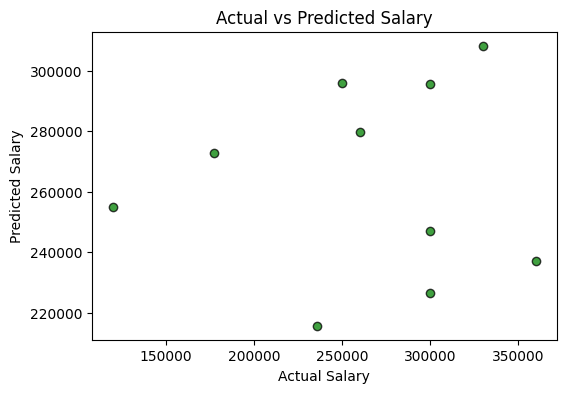

In [28]:
actual_vs_prediction_scatter_plot(test_y,pred_y)

As OLS model did not perform very well lets try to do some feature engineering

<h1> Feature Engineering</h1>

<h2><span style="color: green;">Type1:- Scaling</span></h2> Since we only have one feature, this approach may not be very useful. However, we can still try it to see if it provides any insights.

In [29]:
scaler=StandardScaler()
X=train_X
X_std = scaler.fit_transform(X.values.reshape(-1, 1))

run the previous model again and observe the performance.

In [30]:
X=sm.add_constant(train_X) #feature
mba_reg_model_ols=sm.OLS(train_y,X)
#Fit the regression model
mba_reg_model=mba_reg_model_ols.fit()
print(mba_reg_model.params)
mba_reg_model.summary2()

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2025-02-07 18:12      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8088 176079.3801
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

Did not help. Exactly same as without scaling.
<h2><span style="color: green;">Type2:- Dropping Outliers</span></h2>

<h3> In box plot we can see outlier. As our previous model(stat OLS) did not work well with outlier data we will try to remove this data and see how well our model works </h3>

When the output is not clear then we can take measures like IQR to findout outliers. Lets try that

In [31]:
quaretile1_X=train_X.describe()["25%"]
quaretile3_X=train_X.describe()["75%"]
iqr=quaretile3_X-quaretile1_X
lower_outlier=quaretile1_X-1.5*iqr#data outside of lower end
outlier=mba_salary_df[mba_salary_df['Percentage in Grade 10']<lower_outlier]['Percentage in Grade 10']

In [32]:
#before dropping lets store both the variable for future processing
dropped_train_X=train_X.loc[outlier.index]
dropped_train_y=train_y.loc[outlier.index]

But for testing lets try to drop this outlier and check how the new model works, check the r square value

In [33]:
train_X.drop(outlier.index,inplace=True, errors='ignore')
train_y.drop(outlier.index,inplace=True, errors='ignore')

Try the model again

In [34]:
X=sm.add_constant(train_X) #feature
mba_reg_model_ols=sm.OLS(train_y,X)
#Fit the regression model
mba_reg_model=mba_reg_model_ols.fit()
print(mba_reg_model.params)
mba_reg_model.summary2()

const                    -11287.343313
Percentage in Grade 10     4181.968069
dtype: float64


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
=====================================================================================
Model:                    OLS                    Adj. R-squared:           0.220     
Dependent Variable:       Salary                 AIC:                      983.2137  
Date:                     2025-02-07 18:12       BIC:                      986.5408  
No. Observations:         39                     Log-Likelihood:           -489.61   
Df Model:                 1                      F-statistic:              11.70     
Df Residuals:             37                     Prob (F-statistic):       0.00154   
R-squared:                0.240                  Scale:                    4.9508e+09
-------------------------------------------------------------------------------------
                          Coef.     Std.Err.     t    P>|t|     [0.025       0.975]  
-------------------------------------------------------------------------------------
const                  -11287.3433 79337.3795 -0.1423 0.8876 -172040.1437 149465.4571
Percentage in Grade 10   4181.9681  1222.6300  3.4205 0.0015    1704.6844   6659.2517
-------------------------------------------------------------------------------------
Omnibus:                      1.799              Durbin-Watson:                 2.604
Prob(Omnibus):                0.407              Jarque-Bera (JB):              1.591
Skew:                         0.368              Prob(JB):                      0.451
Kurtosis:                     2.338              Condition No.:                 457  
=====================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

Dropping outlier helped but not too much. Also that data was correct so I will add that data (deleted variables) again and use another type of feature engineering, i.e. polynomial feature.
<h2><span style="color: green;">Type3:- Polynomial Relationship</span></h2><h3>degree=2..10</h3>

Concatenate dropped values

In [35]:
train_X=pd.concat([train_X,dropped_train_X])
train_y=pd.concat([train_y,dropped_train_y])

In [36]:
poly_train_X=PolynomialFeatures(degree=4).fit_transform(train_X_2D) #tried with multiple degree degree=4 giving best bias variance tradeoff

In [37]:
X=sm.add_constant(poly_train_X) #feature
mba_reg_model_ols=sm.OLS(train_y,X)
#Fit the regression model
mba_reg_model=mba_reg_model_ols.fit()
print(mba_reg_model.params)
mba_reg_model.summary2()

const   -8.586295e+06
x1       5.848422e+05
x2      -1.418316e+04
x3       1.492762e+02
x4      -5.747408e-01
dtype: float64


<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                  OLS                Adj. R-squared:       0.059     
Dependent Variable:     Salary             AIC:                  1017.5702 
Date:                   2025-02-07 18:12   BIC:                  1026.0146 
No. Observations:       40                 Log-Likelihood:       -503.79   
Df Model:               4                  F-statistic:          1.616     
Df Residuals:           35                 Prob (F-statistic):   0.192     
R-squared:              0.156              Scale:                5.8220e+09
---------------------------------------------------------------------------
          Coef.       Std.Err.      t    P>|t|      [0.025        0.975]   
---------------------------------------------------------------------------
const -8586294.6972 7014883.3772 -1.2240 0.2291 -22827265.0570 5654675.6627
x1      584842.1718  493898.1389  1.1841 0.2443   -417824.3557 1587508.6994
x2      -14183.1596   12728.2722 -1.1143 0.2727    -40022.9259   11656.6066
x3         149.2762     142.5802  1.0470 0.3023      -140.1769     438.7294
x4          -0.5747       0.5869 -0.9794 0.3341        -1.7661       0.6166
---------------------------------------------------------------------------
Omnibus:                3.895         Durbin-Watson:            2.747      
Prob(Omnibus):          0.143         Jarque-Bera (JB):         3.266      
Skew:                   0.700         Prob(JB):                 0.195      
Kurtosis:               2.983         Condition No.:            12666158441
===========================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
[2] The condition number is large, 1.27e+10. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [38]:
poly_test_X=PolynomialFeatures(degree=4).fit_transform(test_X_2D)
ols_test_X_2D=sm.add_constant(poly_test_X)
pred_y=mba_reg_model.predict(ols_test_X_2D)
print_prediction(test_y, pred_y, test_X)

,10th Grade Percentage,Actual,Predicted
6,70.0,260000,257396.728236
36,68.0,177600,248518.456740
37,52.0,236000,261383.251141
28,58.0,360000,243934.839229
43,74.5,250000,284087.970349
49,60.8,300000,238842.663303
5,55.0,300000,252562.738426
33,78.0,330000,306323.913716
20,63.0,120000,238006.582863
42,74.4,300000,283437.794893


In [39]:
mse_poly,mae_poly,r2_poly=residual_check(test_y,pred_y)
compare_evaluation_metric('ols','poly')

mse=  4106455615.251887 , mae=  51589.75832908796  and r2_score=  0.11978488282050881
MSE wise, poly is better model than ols model, MSE for ols is= 5396084152.419214
MAE wise, poly is better model than ols model, MAE for ols is= 59155.310447690215
R2 wise, poly is better model than ols model, R2 for ols is= -0.156645849742304


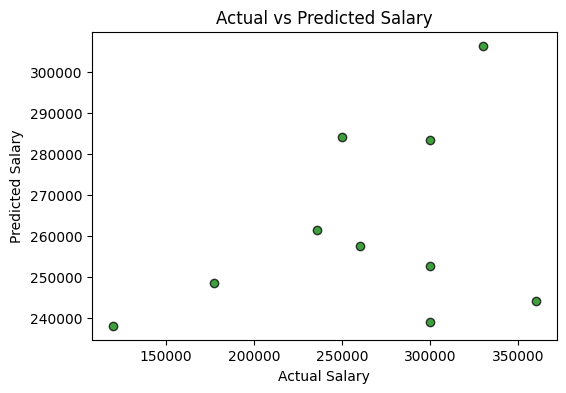

In [40]:
actual_vs_prediction_scatter_plot(test_y,pred_y)

We can see for polynomial feature (degree=4) the performance has increased but still it is not very good as we know only 10th standard grade is not enough to predict someone's salary later. But in few session we will try to findout if advanced regression model can predict it better or not

<h2><span style="color: red;"> Model 2:- </span>Linear Regression Testing</h2> Same as model1. OLS model but only using different library. First one is mainly for Statistics check and this one is for prediction.

In [41]:
mba_sk_linear_reg=LinearRegression().fit(train_X_2D,train_y_2D)
pred_y = mba_sk_linear_reg.predict(test_X_2D)
results=print_prediction(test_y,pred_y.flatten(),test_X)

In [42]:
mse_lin,mae_lin,r2_lin=residual_check(test_y,pred_y)
compare_evaluation_metric('poly','lin')

mse=  5396084152.419214 , mae=  59155.31044769024  and r2_score=  -0.156645849742304
MSE wise poly is better, it's MSE value is= 4106455615.251887
MAE wise poly is better, it's MAE value is= 51589.75832908796
R2 wise poly is better, it's R2 value is= 0.11978488282050881


In [43]:
np.isnan(mba_sk_linear_reg.coef_)

array([[False]])

A scatter plot visualizes the relationship between the actual and predicted values for each data point. It helps assess how well the model predictions align with the actual outcomes.In an ideal scenario, the points on the scatter plot would form a clear, linear pattern along a diagonal line (45-degree angle) indicate the model’s predictions are close to the actual values.

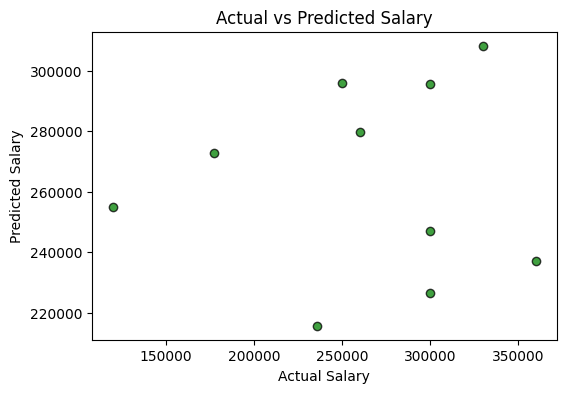

In [44]:
actual_vs_prediction_scatter_plot(test_y,pred_y)

As we can see from the plot our model's performance is not satisfactory.

<h2><span style="color: red;"> Model 3:- </span>LASSO REGRESSION TESTING </h2> L1 Regularization

In [45]:
mba_lasso_reg=Lasso(alpha=0.1).fit(train_X_2D,train_y_2D)
pred_y = mba_lasso_reg.predict(test_X_2D)
results = print_prediction(test_y,pred_y.flatten(),test_X)
results

,10th Grade Percentage,Actual,Predicted
6,70.0,260000,279828.396041
36,68.0,177600,272707.223266
37,52.0,236000,215737.841070
28,58.0,360000,237101.359394
43,74.5,250000,295851.034783
49,60.8,300000,247071.001278
5,55.0,300000,226419.600232
33,78.0,330000,308313.087139
20,63.0,120000,254904.291330
42,74.4,300000,295494.976145


In [46]:
mse_lasso,mae_lasso,r2_lasso=residual_check(test_y,pred_y)
compare_evaluation_metric('poly','lasso')

mse=  5396083692.939485 , mae=  59155.30801630303  and r2_score=  -0.15664575125323155
MSE wise poly is better, it's MSE value is= 4106455615.251887
MAE wise poly is better, it's MAE value is= 51589.75832908796
R2 wise poly is better, it's R2 value is= 0.11978488282050881


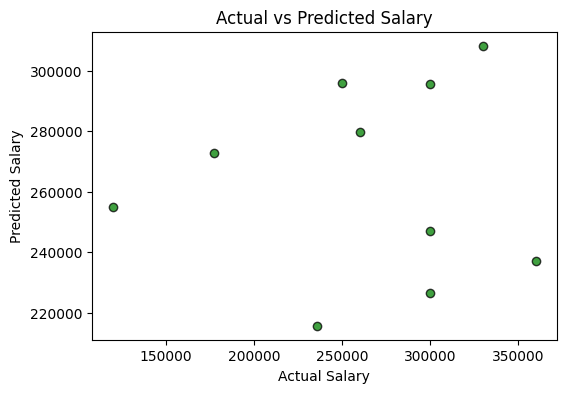

In [47]:
actual_vs_prediction_scatter_plot(test_y,pred_y)

<h2><span style="color: red;"> Model 4:- </span>RIDGE REGRESSION </h2>L2 Regularization

In [48]:
mba_ridge_reg=Ridge(alpha=0.1).fit(train_X_2D,train_y_2D)
pred_y=mba_ridge_reg.predict(test_X_2D)
print_prediction(test_y,pred_y.flatten(),test_X)

,10th Grade Percentage,Actual,Predicted
6,70.0,260000,279827.831771
36,68.0,177600,272706.834249
37,52.0,236000,215738.854075
28,58.0,360000,237101.846640
43,74.5,250000,295850.076195
49,60.8,300000,247071.243171
5,55.0,300000,226420.350358
33,78.0,330000,308311.821858
20,63.0,120000,254904.340445
42,74.4,300000,295494.026318


In [49]:
mse_ridge,mae_ridge,r2_ridge=residual_check(test_y,pred_y)
compare_evaluation_metric('poly','ridge')

mse=  5396043253.578459 , mae=  59155.09402391307  and r2_score=  -0.15663708311208047
MSE wise poly is better, it's MSE value is= 4106455615.251887
MAE wise poly is better, it's MAE value is= 51589.75832908796
R2 wise poly is better, it's R2 value is= 0.11978488282050881


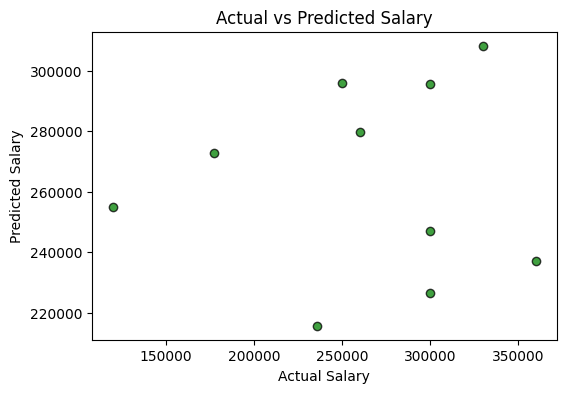

In [50]:
actual_vs_prediction_scatter_plot(test_y,pred_y)

<h2><span style="color: red;"> Model 5:- </span>KNN Nearest Neighbour</h2> As our dataset is very small. Very easy to store in memory.

<h2><span style="color: brown;"> Hyper Parameter Tuning </span> Grid Search CV </h2>

In [51]:
n_neighbors = [1, 3, 5, 7, 9, 11, 13, 15]
gscv_knn = GridSearchCV(KNeighborsRegressor(), param_grid={"n_neighbors": n_neighbors}, cv=5, scoring="neg_mean_squared_error")
gscv_knn.fit(mba_10_percentage_2D, mba_salary_2D)
print("Best number of neighbors:", gscv_knn.best_params_["n_neighbors"])

Best number of neighbors: 15


In [52]:
mba_knn_reg=KNeighborsRegressor(n_neighbors=gscv_knn.best_params_["n_neighbors"]).fit(train_X_2D,train_y_2D)
pred_y=mba_knn_reg.predict(test_X_2D)
print_prediction(test_y,pred_y.flatten(),test_X)

,10th Grade Percentage,Actual,Predicted
6,70.0,260000,269466.666667
36,68.0,177600,269466.666667
37,52.0,236000,221600.000000
28,58.0,360000,229933.333333
43,74.5,250000,257266.666667
49,60.8,300000,259466.666667
5,55.0,300000,230266.666667
33,78.0,330000,293600.000000
20,63.0,120000,245800.000000
42,74.4,300000,257266.666667


In [53]:
mse_knn,mae_knn,r2_knn=residual_check(test_y,pred_y)
compare_evaluation_metric('poly','knn')

mse=  5118903111.111112 , mae=  56826.66666666667  and r2_score=  -0.09723233950033827
MSE wise poly is better, it's MSE value is= 4106455615.251887
MAE wise poly is better, it's MAE value is= 51589.75832908796
R2 wise poly is better, it's R2 value is= 0.11978488282050881


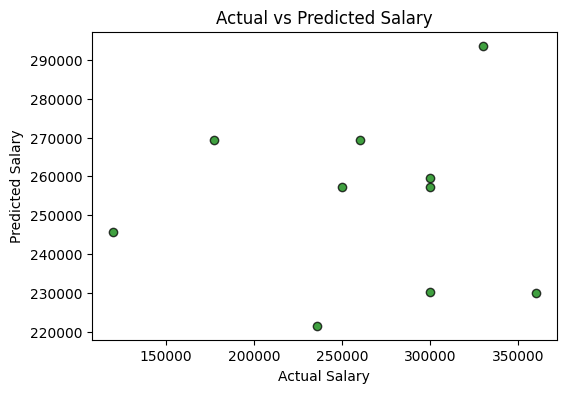

In [54]:
actual_vs_prediction_scatter_plot(test_y,pred_y)

<h2><span style="color: red;"> Model 6:- </span>SVM</h2> 1. As we know SVR works best woth small or medium sized data and we have very small sized data. <br> 2. From graphs and polynomial model we have already seen our model is not linear and we know SVR works well when the relationship between predictors and the target variable is non linear or complex.

<h3><span style="color: brown;"> Hyper Parameter Tuning </span> Grid Search CV </h3>

In [55]:
# Define the range of values for C and gamma hyperparameters
c_values = [0.1, 1.0, 10.0,20.0,30.0]
gamma_values = ['scale', 'auto']
param_grid = {'C': c_values, 'gamma': gamma_values}

gscv_svm = GridSearchCV(SVR(), param_grid=param_grid, cv=5, scoring="neg_mean_squared_error")
gscv_svm.fit(mba_10_percentage_2D, mba_salary_df["Salary"])

print("Best C:", gscv_svm.best_params_["C"])
print("Best gamma:", gscv_svm.best_params_["gamma"])

Best C: 30.0
Best gamma: scale


<h3><span style="color: brown;"> Real Model </span> apply best parameter </h3>

In [56]:
mba_svr_reg = SVR(C=gscv_svm.best_params_["C"], gamma=gscv_svm.best_params_["gamma"])
mba_svr_reg.fit(train_X_2D, train_y)
pred_y = mba_svr_reg.predict(test_X_2D)
print_prediction(test_y,pred_y.flatten(),test_X)

,10th Grade Percentage,Actual,Predicted
6,70.0,260000,249982.126111
36,68.0,177600,249970.888934
37,52.0,236000,250000.099997
28,58.0,360000,249949.551564
43,74.5,250000,249998.760940
49,60.8,300000,249939.691810
5,55.0,300000,249974.124722
33,78.0,330000,250004.213643
20,63.0,120000,249943.066175
42,74.4,300000,249998.517854


In [57]:
mse_svr,mae_svr,r2_svr=residual_check(test_y,pred_y)
compare_evaluation_metric('poly','svr')

mse=  4843830451.699182 , mae=  56646.70684619255  and r2_score=  -0.03827075904690047
MSE wise poly is better, it's MSE value is= 4106455615.251887
MAE wise poly is better, it's MAE value is= 51589.75832908796
R2 wise poly is better, it's R2 value is= 0.11978488282050881


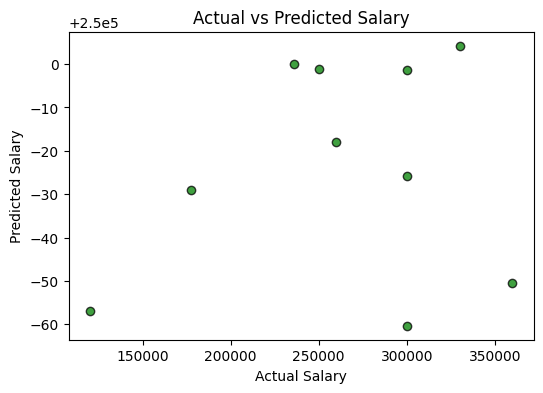

In [58]:
actual_vs_prediction_scatter_plot(test_y,pred_y)

<h2><span style="color: red;"> Model 7:- </span>Decision Tree</h2>Though our data is not large we will try this because of non-linearity of our model.

<h3><span style="color: brown;"> Hyper Parameter Tuning </span> Grid Search CV </h3>

In [59]:
# Define the range of values for the maximum depth hyperparameter
max_depth_values = [1, 2, 4, 8, 16]
param_grid = {'max_depth': max_depth_values}

gscv_decision_tree = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid, cv=5, scoring="neg_mean_squared_error")
gscv_decision_tree.fit(mba_10_percentage_2D, mba_salary_df["Salary"])

print("Best max depth:", gscv_decision_tree.best_params_["max_depth"])

Best max depth: 2


<h3><span style="color: brown;"> Real Model </span> apply best parameter </h3>

In [60]:
# Create a new Decision tree model with the best hyperparameters
mba_decision_tree_reg = DecisionTreeRegressor(max_depth=gscv_decision_tree.best_params_["max_depth"])
mba_decision_tree_reg.fit(train_X_2D, train_y)
pred_y = mba_decision_tree_reg.predict(test_X_2D)
print_prediction(test_y,pred_y.flatten(),test_X)

,10th Grade Percentage,Actual,Predicted
6,70.0,260000,255421.052632
36,68.0,177600,255421.052632
37,52.0,236000,255421.052632
28,58.0,360000,255421.052632
43,74.5,250000,255421.052632
49,60.8,300000,255421.052632
5,55.0,300000,255421.052632
33,78.0,330000,255421.052632
20,63.0,120000,255421.052632
42,74.4,300000,255421.052632


In [61]:
mse_decision_tree,mae_decision_tree,r2_decision_tree=residual_check(test_y,pred_y)
compare_evaluation_metric('poly','decision_tree')

mse=  4728313285.31856 , mae=  55555.7894736842  and r2_score=  -0.013509756939801054
MSE wise poly is better, it's MSE value is= 4106455615.251887
MAE wise poly is better, it's MAE value is= 51589.75832908796
R2 wise poly is better, it's R2 value is= 0.11978488282050881


Visualize Decision Tree

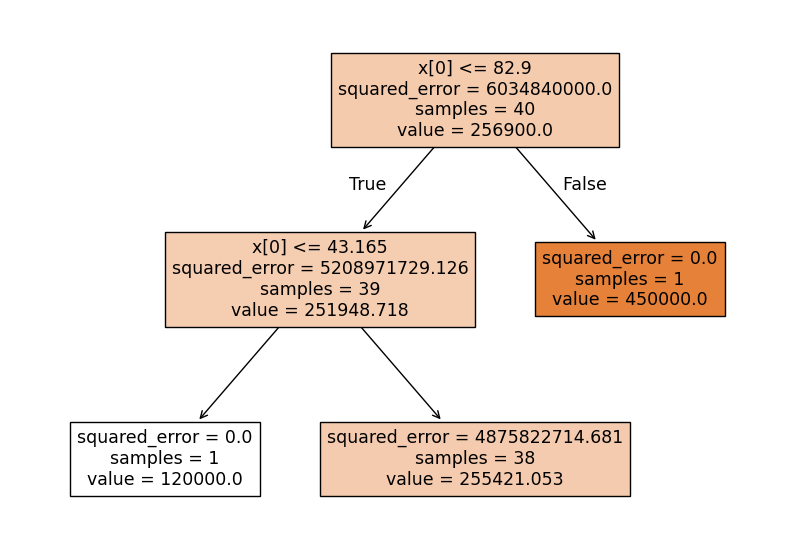

In [62]:
plt.figure(figsize=(10,7))
plot_tree(mba_decision_tree_reg, filled=True)
plt.show()

<h2><span style="color: red;"> Model 8:- </span>Random Forest</h2> 1.Random Forests work well for capturing non-linear relationships between predictor and target variable so in our case we can use it. Aslo it is very good with new unseen data & robust to outliers.

<h3><span style="color: brown;"> Hyper Parameter Tuning </span> Grid Search CV </h3>

In [63]:
# Define the range of values for the n_estimators hyperparameter
param_grid_random_forest = {'n_estimators': [10, 50, 100, 150, 200]}

gscv_random_forest = GridSearchCV( RandomForestRegressor(), param_grid=param_grid_random_forest, cv=5, scoring="neg_mean_squared_error")
gscv_random_forest.fit(mba_10_percentage_2D, mba_salary_df["Salary"])

print("Best n_estimators:", gscv_random_forest.best_params_["n_estimators"])

Best n_estimators: 200


<h3><span style="color: brown;"> Real Model </span> apply best parameter </h3>

In [64]:
rf_model = RandomForestRegressor(n_estimators=gscv_random_forest.best_params_["n_estimators"])
rf_model.fit(train_X_2D, train_y)
pred_y = rf_model.predict(test_X_2D)
print_prediction(test_y,pred_y.flatten(),test_X)

,10th Grade Percentage,Actual,Predicted
6,70.0,260000,251750.892857
36,68.0,177600,240604.851190
37,52.0,236000,228835.833333
28,58.0,360000,230613.333333
43,74.5,250000,243760.000000
49,60.8,300000,176437.619048
5,55.0,300000,292275.000000
33,78.0,330000,245125.000000
20,63.0,120000,270318.333333
42,74.4,300000,243760.000000


In [65]:
mse_random_forest,mae_random_forest,r2_random_forest=residual_check(test_y,pred_y)
compare_evaluation_metric('poly','random_forest')

mse=  6915847361.005972 , mae=  63676.550595238106  and r2_score=  -0.4824057449090311
MSE wise poly is better, it's MSE value is= 4106455615.251887
MAE wise poly is better, it's MAE value is= 51589.75832908796
R2 wise poly is better, it's R2 value is= 0.11978488282050881


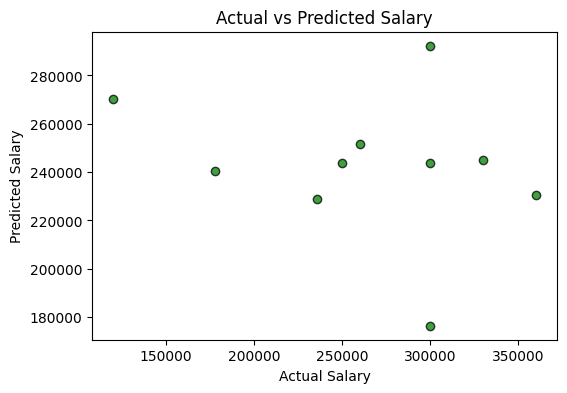

In [66]:
actual_vs_prediction_scatter_plot(test_y,pred_y)

<h1><span style="color: blue;"> Conclusion:- </span></h1>
As we can see, except for the polynomial model, all models have a significant mean absolute error (MAE) and mean squared error (MSE), and the R-squared value is negative for all. Despite having a positive R-square value, the polynomial model is not suitable for publication as it is very complex and prone to overfitting. Additionally, this complex model only explains 11% of the variance, which is a relatively low percentage compared to its complexity.
<h2><span style="color: red;"> Final Verdict:- </span></h2> None of the selected models are satisfactory. Instead, we should consider adding more features to the model, as it is apparent that solely relying on 10th-grade marks is insufficient for accurately predicting the salary of a student after obtaining an MBA. 